<a href="https://colab.research.google.com/github/carlos-cui/data_analysis/blob/master/titanic%20data%20visualization/Visualizing_Titanic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualzing Titanic Data

I know, I know, we're all tired of the Titanic dataset but it's part of this exercise

I'll be the seaborn visualization library for visuals

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
# we'll use the style used in by the fivethirtyeight website for visuals
plt.style.use('fivethirtyeight')

In [0]:
# we will be using the train dataset
titanic = pd.read_csv('https://raw.githubusercontent.com/carlos-cui/data_analysis/master/titanic%20data%20visualization/train.csv')

In [13]:
titanic.shape

(891, 12)

In [14]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [0]:
# let's drop columns we won't be using for exploration
titanic.drop(['PassengerId', 'Name', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [0]:
# we will also be dropping any rows with null values
titanic.dropna(inplace=True)

In [17]:
titanic.shape

(712, 7)

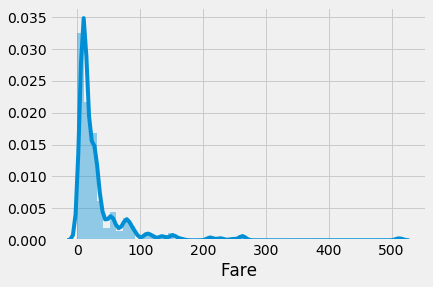

In [24]:
# let's biuld our first visual of the Fare amounts
sns.distplot(titanic['Fare'])
plt.show()

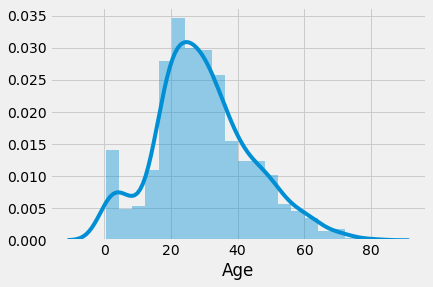

In [31]:
# and now a kernel density plot of ages
sns.distplot(titanic['Age'])

Text(0.5, 0, 'Age')

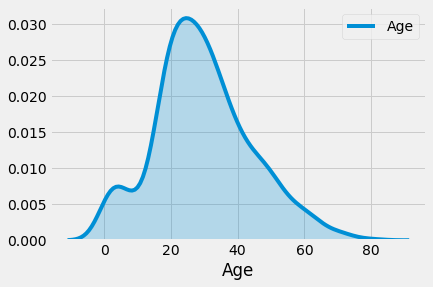

In [33]:
# visualizing only the kernal density plot and adding some shade under the line
sns.kdeplot(titanic['Age'], shade=True)
plt.xlabel('Age')